<a href="https://colab.research.google.com/github/pranabkb/AIML-Course/blob/main/Introduction%20to%20Neural%20Networks/Introduction%20to%20Deep%20Neural%20Networks%20Hands-on%20Quiz/Hands-on%20Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

**Please download and import the dataset 'Loan_payments_data.csv' into Jupyter Notebook to attempt the quiz.**

**Context:**

Since the beginning of the brief history of Neural Networks, there has been the need to clearly understand, how the computation in the Neural Network works. We also need to have a brief understanding of Keras and Tensorflow in order to understand the neurons and the layers in Neural Network in a better way. A dataset is also used in some of the questions of the quiz So you can download it beforehand and import it into jupyter notebook before attempting the Quiz.

This data set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in the collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. Of course, they could pay off earlier than their pay schedule.

 

### Attribute information:

**LOAN_ID**: A unique loan number assigned to each loan customer

**Loan_status**: Whether a loan is paid off, in the collection, new customer yet to pay off, or paid off after the collection efforts

**Principal**: Basic principal loan amount at the origination

**terms**: Can be weekly (7 days), biweekly, and monthly payoff schedule

**Effective_date**: When the loan got originated and took effects

**Due_date**: Since it’s a one-time payoff schedule, each loan has one single due date

**Paidoff_time**: The actual time a customer pays off the loan

**Pastdue_days**: How many days a loan has been past due

**Age, education, gender**: A customer’s basic demographic information

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the required libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import pyplot
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
from collections import Counter
from keras import callbacks
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import backend
from random import shuffle
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.chdir("drive/MyDrive/Colab Notebooks/Data")

#### Reading the Dataset 

In [4]:
os.listdir()

['Loan_payments_data.csv', 'new_preprocessed_data.csv']

In [5]:
#Since data is in form of csv file we have to use pandas pd.read_csv to load the data.
data = pd.read_csv('Loan_payments_data.csv')

#### Print the first five rows of the data

In [6]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [7]:
#Information about the data
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [8]:
#Checking the shape of the data
data.shape

(500, 11)

In [9]:
#finding the null values
data.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

* Those 2 values belong to a single row so we can drop that row

In [10]:
#drop the nullvalues
#data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [12]:
#Checking the dtypes of the variables in the data
data.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

* The dtypes of 'Date_of_Journey','Dep_Time',and 'Arrival_Time' is in object, so firstly converting it into datetime dtype 

In [13]:
# Creating a function to convert those columns into datetime dtype
def To_Datetime(data,column):
    data[column] = pd.to_datetime(data[column])
    return data[column]

In [14]:
To_Datetime(data,'effective_date')
To_Datetime(data,'due_date')
To_Datetime(data,'paid_off_time')

0     2016-09-14 19:31:00
1     2016-10-07 09:00:00
2     2016-09-25 16:58:00
3     2016-09-22 20:00:00
4     2016-09-23 21:36:00
              ...        
495   2016-10-14 19:08:00
496   2016-10-10 20:02:00
497   2016-09-29 11:49:00
498   2016-11-11 22:40:00
499   2016-10-19 11:58:00
Name: paid_off_time, Length: 500, dtype: datetime64[ns]

In [15]:
data.drop(['Loan_ID'],axis=1,inplace=True)

* Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

### Exploratory Data Analysis

#### Univariate Analysis

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

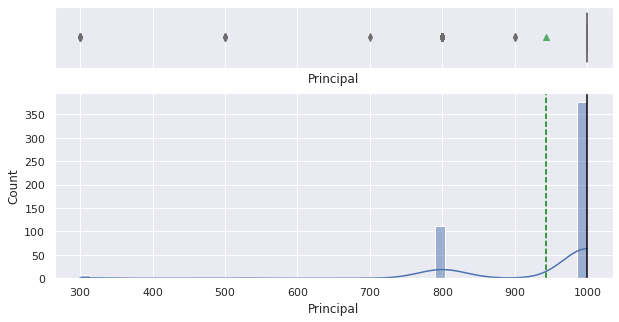

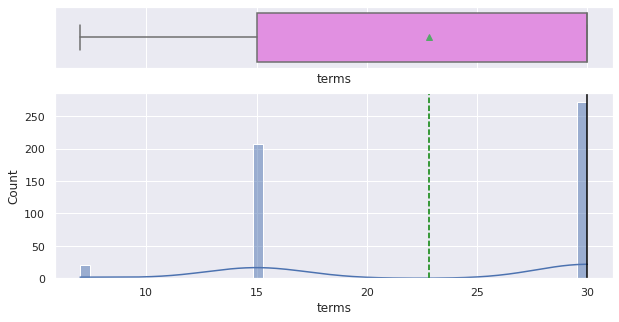

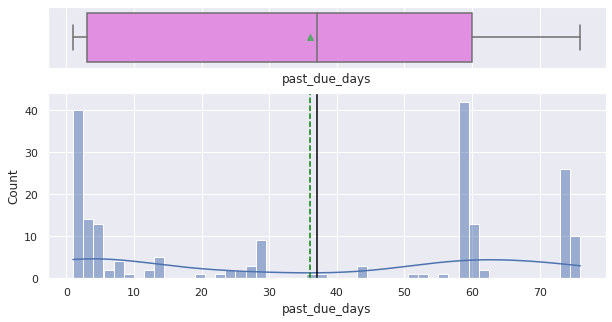

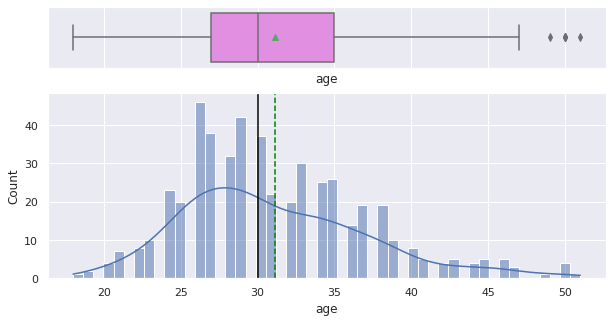

In [18]:
# selecting numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

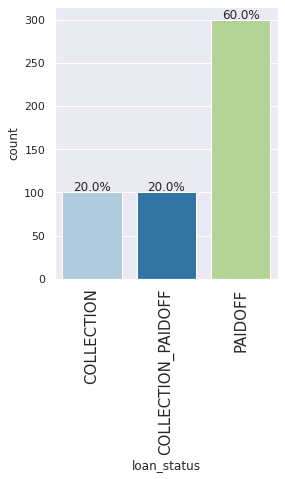

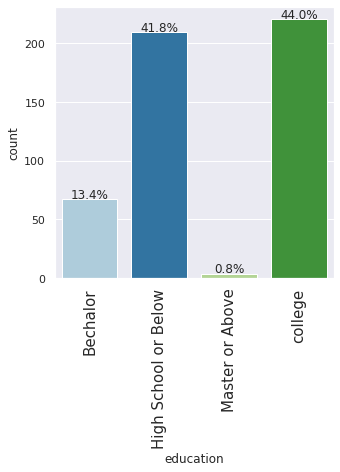

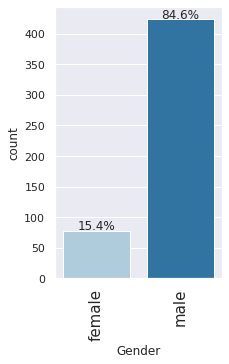

In [19]:
# selecting numerical columns
obj_cols = data.select_dtypes(include=np.object).columns.tolist()

for item in obj_cols:
    labeled_barplot(data, item, perc=True)

### Bivariate analysis

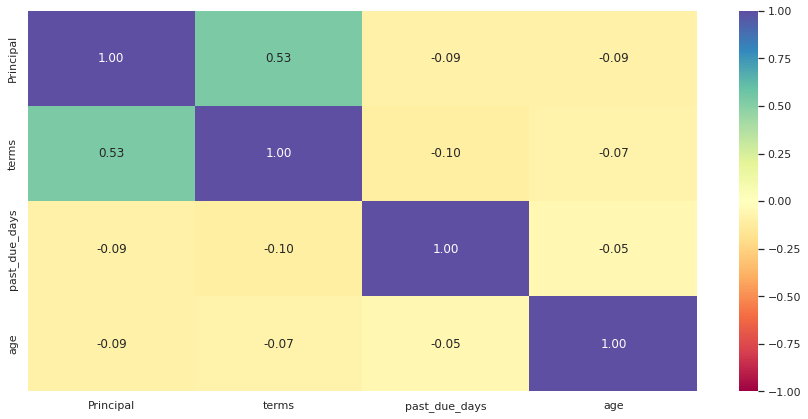

In [20]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Day of Journey is highly correlated to target column

In [21]:
### function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    axs[0, 0].set_title("Distribution of " + predictor)
    sns.histplot(
        data=data, x=predictor, kde=True, ax=axs[0, 0], color="teal", stat="density",
    )

    axs[0, 1].set_title("Distribution of " + target)
    sns.histplot(
        data=data, x=target, kde=True, ax=axs[0, 1], color="orange", stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [22]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

past_due_days  1.0  2.0  3.0  4.0  5.0  6.0  ...  61.0  73.0  74.0  75.0  76.0  All
Gender                                       ...                                   
male            13   18   13    8    4    2  ...     2     1    23     5     3  176
All             18   22   14    8    5    2  ...     2     1    25     7     3  200
female           5    4    1    0    1    0  ...     0     0     2     2     0   24

[3 rows x 34 columns]
------------------------------------------------------------------------------------------------------------------------


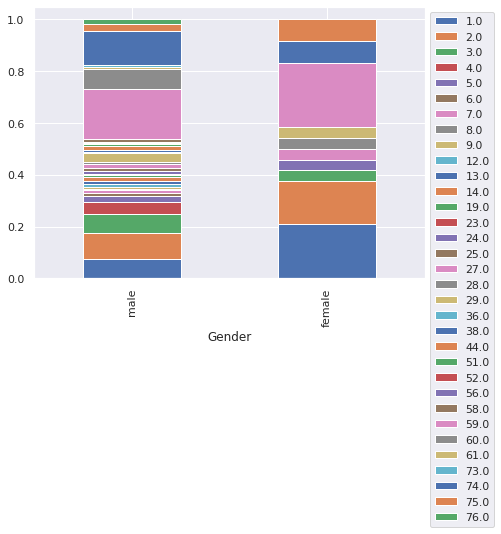

In [23]:
stacked_barplot(data, "Gender", "past_due_days")

### Data Preprocessing

In [24]:
data_pre = data.copy()

In [25]:
data_pre['actual_tenure_days'] = (data_pre['due_date'] - data_pre['effective_date'])/np.timedelta64(1,'D')
data_pre['paidoff_tenure_days'] = (data_pre['paid_off_time'] - data_pre['effective_date'])/np.timedelta64(1,'D')

In [26]:
data_pre.head()

,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,actual_tenure_days,paidoff_tenure_days
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,NaN,45,High School or Below,male,29.0,6.813194
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,female,29.0,29.375000
2,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,NaN,33,Bechalor,female,29.0,17.706944
3,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,NaN,27,college,male,14.0,14.833333
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,NaN,28,college,female,29.0,14.900000


In [27]:
data_pre.isnull().sum()

loan_status              0
Principal                0
terms                    0
effective_date           0
due_date                 0
paid_off_time          100
past_due_days          300
age                      0
education                0
Gender                   0
actual_tenure_days       0
paidoff_tenure_days    100
dtype: int64

In [28]:
data_pre['past_due_days'] = data_pre['past_due_days'].fillna(0)

In [29]:
data_pre['paidoff_tenure_days'] = data_pre.groupby(['Principal','terms','age','education','Gender'])['paidoff_tenure_days'].transform(lambda x:x.fillna(x.median()))
data_pre['paidoff_tenure_days'] = data_pre['paidoff_tenure_days'].fillna(0)

In [30]:
data.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [31]:
data_pre.drop(['effective_date','due_date','paid_off_time'],axis=1,inplace=True)

In [32]:
## Storing required categorical variables in cat_dat to apply dummification 
cat_data = ['loan_status','education','Gender']
data_dum = pd.get_dummies(data_pre,columns=cat_data,drop_first= True)

In [33]:
##Splitting Independent and dependent variable in X and Y respectively
X = data_dum.drop(['paidoff_tenure_days'],axis=1)
Y = data_dum[['paidoff_tenure_days']]

print(X.shape)
print(Y.shape)
print(type(X))

(500, 11)
(500, 1)
<class 'pandas.core.frame.DataFrame'>


In [34]:
# Splitting the dataset into the Training and Testing set.
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [35]:
X_train.head()

,Principal,terms,past_due_days,age,actual_tenure_days,loan_status_COLLECTION_PAIDOFF,loan_status_PAIDOFF,education_High School or Below,education_Master or Above,education_college,Gender_male
5,300,7,0.0,35,6.0,0,1,0,1,0,1
116,1000,30,0.0,40,29.0,0,1,0,0,1,1
45,800,7,0.0,35,6.0,0,1,1,0,0,1
16,1000,30,0.0,40,29.0,0,1,1,0,0,1
462,1000,30,5.0,26,59.0,1,0,0,0,1,1


In [36]:
X_val.head()

,Principal,terms,past_due_days,age,actual_tenure_days,loan_status_COLLECTION_PAIDOFF,loan_status_PAIDOFF,education_High School or Below,education_Master or Above,education_college,Gender_male
361,800,15,74.0,29,14.0,0,0,1,0,0,1
73,1000,15,0.0,34,14.0,0,1,0,0,1,1
374,1000,30,59.0,29,29.0,0,0,0,0,1,1
155,1000,30,0.0,36,29.0,0,1,1,0,0,0
104,1000,15,0.0,35,14.0,0,1,0,0,1,1


In [37]:
# Checking the shape
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(350, 11)
(150, 11)
(350, 1)
(150, 1)


In [38]:
## Scaling the data
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
y_train = sc.fit_transform(y_train)   ## Scaling the Target variable (contionous variable) 
y_val_scale = sc.transform(y_val)

In [39]:
scaler_Y = preprocessing.StandardScaler().fit(Y)

### Model performance check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$
* We will create a function that will print out all the above metrics in one go.

**Weight Initialization**

Weight initialization is an important consideration in the design of a neural network model.

The nodes in neural networks are composed of parameters referred to as weights used to calculate a weighted sum of the inputs.

Neural network models are fit using an optimization algorithm called stochastic gradient descent that incrementally changes the network weights to minimize a loss function, hopefully resulting in a set of weights for the mode that is capable of making useful predictions.

This optimization algorithm requires a starting point in the space of possible weight values from which to begin the optimization process. Weight initialization is a procedure to set the weights of a neural network to small random values that define the starting point for the optimization (learning or training) of the neural network model.

There are many WI techniques as follows:

1) Random normal initialization

2) Random Uniform initialization

3) Xaviour Initialization

4) He Initialization 


# Model Building

- We will now start with the model building process.
- We will create a model.
 - Three hidden layer with ReLU as activation function.
 - Output layer with 1 nodes (For regression problem )

In [40]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [41]:
model = Sequential()
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,937
Trainable params: 3,937
Non-trainable params: 0
_________________________________________________________________


**Observations**
- The summary of the model shows each layer's name, type, output shape, and the number of parameters at that particular layer.
- It also shows the total number of trainable and non-trainable parameters in the model. A parameter whose value is learned while training the model is called a trainable parameter otherwise it is called a non-trainable parameter.
- In the first layer total parameters are calculated by the number of neurons in the hidden layer multiplied by the number of variables fed to neural networks plus bias. (27*64)+64 = 1792
- In the next layer the parameters are calculated by the number of outputs from the previous layer multiplied by the number of neurons in the second layer plus bias. (64*32)+32 =2080
- You can calculate for the third layer and final layer.

In [43]:
optimizer = RMSprop( learning_rate=0.001)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
#es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50)

Epoch 1/50
11/11 [==============================] - 4s 48ms/step - loss: 0.6286 - mae: 0.5666 - val_loss: 0.5852 - val_mae: 0.5073
Epoch 2/50
11/11 [==============================] - 0s 15ms/step - loss: 0.4137 - mae: 0.4537 - val_loss: 0.5561 - val_mae: 0.4991
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 0.3460 - mae: 0.4173 - val_loss: 0.5341 - val_mae: 0.4752
Epoch 4/50
11/11 [==============================] - 0s 9ms/step - loss: 0.3075 - mae: 0.3820 - val_loss: 0.4940 - val_mae: 0.4414
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 0.2700 - mae: 0.3620 - val_loss: 0.4766 - val_mae: 0.4224
Epoch 6/50
11/11 [==============================] - 0s 14ms/step - loss: 0.2526 - mae: 0.3449 - val_loss: 0.4691 - val_mae: 0.4191
Epoch 7/50
11/11 [==============================] - 0s 20ms/step - loss: 0.2320 - mae: 0.3235 - val_loss: 0.4879 - val_mae: 0.4280
Epoch 8/50
11/11 [==============================] - 0s 19ms/step - loss: 0.2024 - mae:

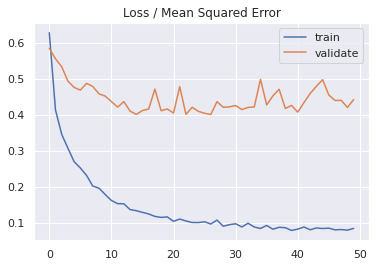

In [44]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

* Here the model seems to be overfitted, as the distance between the train curve and validation curve started increasing. 

In [45]:
#Lets predict on validation data
Y_result_scaled= model.predict(X_val)
##As we have scaled the target variable, now after predicting we should inverse the scale and should convert to normal form
Y_result = scaler_Y.inverse_transform(Y_result_scaled) 
print(Y_result)

[[10.333966 ]
 [12.903568 ]
 [29.687119 ]
 [26.543148 ]
 [12.5240345]
 [11.555624 ]
 [28.402077 ]
 [26.016306 ]
 [ 5.792426 ]
 [34.028088 ]
 [10.843436 ]
 [10.2517395]
 [17.085897 ]
 [26.448498 ]
 [24.616934 ]
 [41.18754  ]
 [32.070084 ]
 [12.4621525]
 [32.87348  ]
 [73.87625  ]
 [33.983723 ]
 [59.067486 ]
 [13.3476305]
 [28.649456 ]
 [27.251348 ]
 [60.0605   ]
 [21.693905 ]
 [23.255964 ]
 [11.075281 ]
 [56.22837  ]
 [55.04619  ]
 [28.224365 ]
 [42.27908  ]
 [29.833363 ]
 [28.08396  ]
 [ 7.0059557]
 [18.466341 ]
 [11.153604 ]
 [25.032278 ]
 [28.416578 ]
 [31.669094 ]
 [13.239769 ]
 [32.468025 ]
 [27.407495 ]
 [27.19717  ]
 [27.167671 ]
 [24.84131  ]
 [21.60296  ]
 [17.971243 ]
 [25.030558 ]
 [28.08396  ]
 [24.89724  ]
 [13.4222355]
 [26.65294  ]
 [29.728964 ]
 [12.28737  ]
 [13.410973 ]
 [24.482206 ]
 [25.30625  ]
 [19.731773 ]
 [32.533043 ]
 [ 8.14741  ]
 [11.811185 ]
 [34.84219  ]
 [27.093676 ]
 [25.108313 ]
 [15.530138 ]
 [25.74799  ]
 [32.38897  ]
 [15.614399 ]
 [32.594025 ]
 [33.8

In [46]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
def model_performance_regression(predictors,target,pred):
  r2 = r2_score(target, pred)  # to compute R-squared
  adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
  rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
  mae = mean_absolute_error(target, pred)  # to compute MAE

  df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

  return df_perf

In [47]:
# Checking model performance on train set
print("Training Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result)
model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,9.91488,5.308915,0.556037,0.520648


* Now, let's try changing the optimizer to Adam and see if we can overcome the overfitting problem. 

#### Building the model with Adam Optimizer (Model-2)

**Early stopping:** 

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations.The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

In [48]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [49]:
model_2 = Sequential()
model_2.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
model_2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(1, activation='linear'))

In [50]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,937
Trainable params: 3,937
Non-trainable params: 0
_________________________________________________________________


In [51]:
optimizer = Adam( learning_rate=0.001)
model_2.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50,callbacks=es_cb)

Epoch 1/50
11/11 [==============================] - 3s 70ms/step - loss: 0.6913 - mae: 0.6036 - val_loss: 0.6860 - val_mae: 0.5789
Epoch 2/50
11/11 [==============================] - 0s 20ms/step - loss: 0.4567 - mae: 0.4917 - val_loss: 0.5877 - val_mae: 0.5099
Epoch 3/50
11/11 [==============================] - 0s 24ms/step - loss: 0.3661 - mae: 0.4379 - val_loss: 0.5554 - val_mae: 0.4894
Epoch 4/50
11/11 [==============================] - 0s 14ms/step - loss: 0.3135 - mae: 0.3910 - val_loss: 0.5140 - val_mae: 0.4527
Epoch 5/50
11/11 [==============================] - 0s 21ms/step - loss: 0.2771 - mae: 0.3595 - val_loss: 0.4941 - val_mae: 0.4371
Epoch 6/50
11/11 [==============================] - 0s 22ms/step - loss: 0.2515 - mae: 0.3427 - val_loss: 0.4896 - val_mae: 0.4279
Epoch 7/50
11/11 [==============================] - 0s 22ms/step - loss: 0.2314 - mae: 0.3202 - val_loss: 0.4710 - val_mae: 0.4146
Epoch 8/50
11/11 [==============================] - 0s 27ms/step - loss: 0.2104 - m

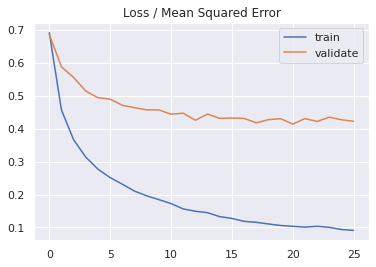

In [52]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_2.history['loss'], label='train')
pyplot.plot(history_2.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

*  After using Adam also, the model seems to be overfitted.

In [53]:
#Lets predict on validation data
Y_result_scaled_2= model_2.predict(X_val)
##As we have scaled the target variable, now after predicting we should inverse the scale and should convert to normal form
Y_result2 = scaler_Y.inverse_transform(Y_result_scaled_2) 
print(Y_result2)

[[12.876921 ]
 [12.934843 ]
 [30.713392 ]
 [28.194544 ]
 [12.388604 ]
 [14.220611 ]
 [28.93277  ]
 [26.338688 ]
 [ 3.2599761]
 [33.63736  ]
 [11.26235  ]
 [12.089673 ]
 [19.173899 ]
 [27.865643 ]
 [26.470243 ]
 [34.021633 ]
 [31.49007  ]
 [13.40938  ]
 [31.950874 ]
 [75.42253  ]
 [34.709637 ]
 [57.391262 ]
 [13.363743 ]
 [29.03866  ]
 [26.113003 ]
 [63.73306  ]
 [21.405375 ]
 [23.93719  ]
 [11.9312105]
 [54.131485 ]
 [55.67498  ]
 [29.878958 ]
 [42.954773 ]
 [29.797462 ]
 [27.534454 ]
 [16.804932 ]
 [18.746769 ]
 [11.016831 ]
 [25.56666  ]
 [27.31174  ]
 [30.840317 ]
 [14.110774 ]
 [33.164616 ]
 [29.79259  ]
 [27.331436 ]
 [26.98821  ]
 [26.536879 ]
 [23.740381 ]
 [19.513237 ]
 [25.810253 ]
 [27.534454 ]
 [25.030003 ]
 [13.545162 ]
 [26.250578 ]
 [32.271503 ]
 [11.88052  ]
 [13.730872 ]
 [24.421972 ]
 [26.823242 ]
 [21.394104 ]
 [31.26053  ]
 [10.063002 ]
 [10.298881 ]
 [36.189217 ]
 [27.362942 ]
 [27.341234 ]
 [17.363214 ]
 [27.460949 ]
 [31.475325 ]
 [19.030882 ]
 [31.170065 ]
 [31.9

In [54]:
# Checking model performance on train set
print("Training Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result2)
model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,9.662311,5.172728,0.578367,0.544759


* After using Adam optimizer, the model seems to be overfitted. 
* Let's use two Regularization techniques to reduce the overfitting problem. 

 - Dropout 
 - BatchNormalization

#### Model-3

**Dropout**

Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.

In [55]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [56]:
model_3 = Sequential()
model_3.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
model_3.add(Dropout(0.2))
model_3.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dropout(0.1))
model_3.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dense(1, activation='linear'))

In [57]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,937
Trainable params: 3,937
Non-trainabl

In [58]:
optimizer = Adam(0.001)
model_3.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
history_3 = model_3.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50,callbacks=es_cb)

Epoch 1/50
11/11 [==============================] - 3s 68ms/step - loss: 0.9960 - mae: 0.7306 - val_loss: 0.7188 - val_mae: 0.5879
Epoch 2/50
11/11 [==============================] - 0s 18ms/step - loss: 0.7696 - mae: 0.6598 - val_loss: 0.6439 - val_mae: 0.5387
Epoch 3/50
11/11 [==============================] - 0s 21ms/step - loss: 0.6431 - mae: 0.6076 - val_loss: 0.6043 - val_mae: 0.5148
Epoch 4/50
11/11 [==============================] - 0s 20ms/step - loss: 0.7161 - mae: 0.6129 - val_loss: 0.5984 - val_mae: 0.5164
Epoch 5/50
11/11 [==============================] - 0s 27ms/step - loss: 0.5219 - mae: 0.5455 - val_loss: 0.5801 - val_mae: 0.4996
Epoch 6/50
11/11 [==============================] - 0s 17ms/step - loss: 0.5702 - mae: 0.5539 - val_loss: 0.5565 - val_mae: 0.4716
Epoch 7/50
11/11 [==============================] - 0s 27ms/step - loss: 0.5518 - mae: 0.5252 - val_loss: 0.5558 - val_mae: 0.4737
Epoch 8/50
11/11 [==============================] - 0s 19ms/step - loss: 0.5435 - m

#### Just by changing the optimizers we are able to reduce the loss to 19.25% and 22.16% for validation data 

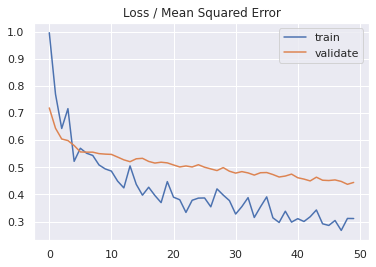

In [59]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_3.history['loss'], label='train')
pyplot.plot(history_3.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

* After using Dropout the both curves seems to be smooth

In [60]:
Y_result_scaled_3= model_3.predict(X_val)
Y_result_3 = scaler_Y.inverse_transform(Y_result_scaled_3)
print(Y_result_3)

[[19.383148 ]
 [14.558552 ]
 [28.917177 ]
 [24.653454 ]
 [14.744953 ]
 [21.28448  ]
 [27.97709  ]
 [23.785166 ]
 [ 2.2244709]
 [31.724714 ]
 [11.054335 ]
 [ 9.882922 ]
 [19.597439 ]
 [24.676928 ]
 [29.092995 ]
 [27.054798 ]
 [32.172253 ]
 [15.695518 ]
 [27.265022 ]
 [55.76723  ]
 [32.64332  ]
 [50.12545  ]
 [15.539819 ]
 [31.921999 ]
 [22.917223 ]
 [51.34886  ]
 [17.939812 ]
 [23.425085 ]
 [13.433076 ]
 [29.959753 ]
 [42.46708  ]
 [28.487265 ]
 [39.982956 ]
 [24.759436 ]
 [25.423403 ]
 [20.864887 ]
 [19.564346 ]
 [11.474954 ]
 [24.494448 ]
 [24.381462 ]
 [26.713718 ]
 [14.124988 ]
 [31.743591 ]
 [25.409582 ]
 [23.221605 ]
 [23.511293 ]
 [24.454847 ]
 [18.231464 ]
 [18.943571 ]
 [23.786818 ]
 [25.423403 ]
 [24.204166 ]
 [15.398277 ]
 [23.053421 ]
 [26.515312 ]
 [12.450069 ]
 [12.35642  ]
 [23.583246 ]
 [24.654799 ]
 [22.03493  ]
 [31.926348 ]
 [20.459343 ]
 [ 9.315775 ]
 [36.47754  ]
 [25.707745 ]
 [22.885208 ]
 [19.599718 ]
 [24.082317 ]
 [24.348616 ]
 [22.88521  ]
 [28.425259 ]
 [30.2

In [61]:
r_squared_3 = r2_score(y_val, Y_result_3)
print('r2 = {}'.format(r_squared_3))

r2 = 0.5521042160811104


In [62]:
# Checking model performance on train set
print("Training Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result_3)
model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,9.958693,6.039702,0.552104,0.516402


The Adjusted R-Square has increased when compared to the previous model. Now lets try BatchNormalization technique to improve the score. 

#### Model-4

In [63]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [64]:
model_4 = Sequential()
model_4.add(Dense(64, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
model_4.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_4.add(BatchNormalization())
model_4.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_4.add(Dense(1, activation='linear'))

In [65]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,065
Trainable params: 4,001
Non-trainable params: 64
_____________________________________________________

In [66]:
optimizer = Adam(0.001)
model_4.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
history_4 = model_4.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50,callbacks=es_cb)

Epoch 1/50
11/11 [==============================] - 2s 51ms/step - loss: 1.0444 - mae: 0.8171 - val_loss: 0.7791 - val_mae: 0.6154
Epoch 2/50
11/11 [==============================] - 0s 23ms/step - loss: 0.5594 - mae: 0.5680 - val_loss: 0.7344 - val_mae: 0.5979
Epoch 3/50
11/11 [==============================] - 0s 20ms/step - loss: 0.4549 - mae: 0.5072 - val_loss: 0.6983 - val_mae: 0.5733
Epoch 4/50
11/11 [==============================] - 0s 20ms/step - loss: 0.3721 - mae: 0.4490 - val_loss: 0.6608 - val_mae: 0.5348
Epoch 5/50
11/11 [==============================] - 0s 20ms/step - loss: 0.3203 - mae: 0.3937 - val_loss: 0.6315 - val_mae: 0.5039
Epoch 6/50
11/11 [==============================] - 0s 19ms/step - loss: 0.3266 - mae: 0.4183 - val_loss: 0.6179 - val_mae: 0.4935
Epoch 7/50
11/11 [==============================] - 0s 16ms/step - loss: 0.2517 - mae: 0.3605 - val_loss: 0.6037 - val_mae: 0.4831
Epoch 8/50
11/11 [==============================] - 0s 23ms/step - loss: 0.2502 - m

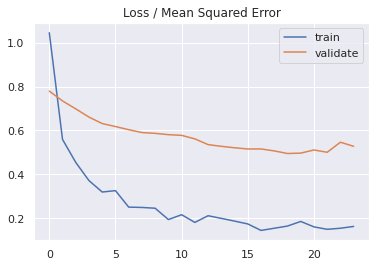

In [67]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_4.history['loss'], label='train')
pyplot.plot(history_4.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

* The gap between both the loss curves is somewhat high when compared to the previous model.

In [68]:
Y_result_scaled_4= model_4.predict(X_val)
Y_result_4 = scaler_Y.inverse_transform(Y_result_scaled_4)
print(Y_result_4)

[[18.139067 ]
 [15.759584 ]
 [31.170155 ]
 [27.144302 ]
 [15.567216 ]
 [21.844555 ]
 [29.301975 ]
 [29.40697  ]
 [ 6.331229 ]
 [31.511362 ]
 [14.348019 ]
 [13.596628 ]
 [22.156616 ]
 [26.849964 ]
 [25.481459 ]
 [43.976265 ]
 [33.71201  ]
 [12.67047  ]
 [29.159508 ]
 [68.420616 ]
 [32.718674 ]
 [56.58474  ]
 [13.699549 ]
 [35.277954 ]
 [26.550959 ]
 [62.54553  ]
 [23.719923 ]
 [26.77574  ]
 [12.959484 ]
 [49.630585 ]
 [53.098335 ]
 [30.218176 ]
 [43.194786 ]
 [31.62296  ]
 [27.314188 ]
 [14.737434 ]
 [21.541605 ]
 [13.059304 ]
 [26.487335 ]
 [30.58484  ]
 [28.767307 ]
 [13.324422 ]
 [31.006872 ]
 [27.55741  ]
 [31.022245 ]
 [30.519838 ]
 [28.300142 ]
 [17.234695 ]
 [22.805586 ]
 [26.257221 ]
 [27.314188 ]
 [25.354849 ]
 [13.916302 ]
 [24.303808 ]
 [28.851706 ]
 [14.106258 ]
 [11.925336 ]
 [26.62092  ]
 [30.529608 ]
 [21.92786  ]
 [32.7535   ]
 [20.961946 ]
 [15.46967  ]
 [35.958565 ]
 [29.245773 ]
 [24.666052 ]
 [18.754923 ]
 [28.669994 ]
 [27.251183 ]
 [23.439346 ]
 [29.6111   ]
 [31.4

In [69]:
r_squared_4 = r2_score(y_val, Y_result_4)
print('r2 = {}'.format(r_squared_4))

r2 = 0.4748263912645363


In [70]:
# Checking model performance on train set
print("Training Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result_4)
model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,10.783638,5.823091,0.474826,0.432965


* BatchNormalization technique did not perform well on and even the Adjusted R-square has been decreased.
* Let's try to build another model using Dropout with different neural network architecture and see if we can increase the Adjusted R-square. 

### Model-5

In [71]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [72]:
model_5 = Sequential()
model_5.add(Dense(128, activation='relu',kernel_initializer='he_uniform', input_shape=(11,)))
model_5.add(Dropout(0.2))
model_5.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_5.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_5.add(Dropout(0.1))
model_5.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_5.add(Dense(1, activation='linear'))

In [73]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 3

In [74]:
optimizer = Adam(0.001)
model_5.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae'])
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)
history_5 = model_5.fit(X_train, y_train, validation_data=(X_val, y_val_scale), epochs=50,callbacks=es_cb)

Epoch 1/50
11/11 [==============================] - 1s 31ms/step - loss: 1.6868 - mae: 1.0014 - val_loss: 0.7885 - val_mae: 0.6451
Epoch 2/50
11/11 [==============================] - 0s 10ms/step - loss: 0.8111 - mae: 0.6798 - val_loss: 0.6386 - val_mae: 0.5106
Epoch 3/50
11/11 [==============================] - 0s 11ms/step - loss: 0.6010 - mae: 0.5763 - val_loss: 0.5872 - val_mae: 0.4646
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 0.5709 - mae: 0.5378 - val_loss: 0.5644 - val_mae: 0.4559
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 0.4444 - mae: 0.4566 - val_loss: 0.5410 - val_mae: 0.4496
Epoch 6/50
11/11 [==============================] - 0s 8ms/step - loss: 0.4600 - mae: 0.4810 - val_loss: 0.5239 - val_mae: 0.4441
Epoch 7/50
11/11 [==============================] - 0s 9ms/step - loss: 0.4501 - mae: 0.4752 - val_loss: 0.5149 - val_mae: 0.4422
Epoch 8/50
11/11 [==============================] - 0s 9ms/step - loss: 0.4616 - mae: 0

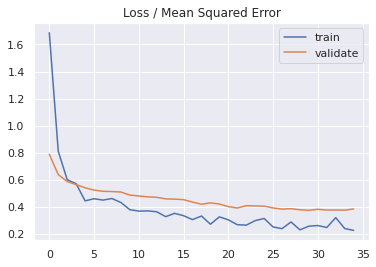

In [75]:
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history_5.history['loss'], label='train')
pyplot.plot(history_5.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

* We can observe that after increasing the layers, both the curves seems to be smooth. 

In [76]:
Y_result_scaled_5= model_5.predict(X_val)
Y_result_5 = scaler_Y.inverse_transform(Y_result_scaled_5)
print(Y_result_5)

[[16.519463 ]
 [14.28487  ]
 [28.876265 ]
 [25.315523 ]
 [14.662346 ]
 [16.645142 ]
 [26.638378 ]
 [25.220081 ]
 [ 6.7196856]
 [31.845226 ]
 [10.656248 ]
 [10.854328 ]
 [18.681068 ]
 [25.283594 ]
 [27.710161 ]
 [19.1631   ]
 [31.460497 ]
 [12.992111 ]
 [28.399803 ]
 [70.40184  ]
 [33.42602  ]
 [49.92522  ]
 [12.309673 ]
 [34.09476  ]
 [24.116203 ]
 [56.70266  ]
 [20.352755 ]
 [23.493046 ]
 [12.758205 ]
 [40.87709  ]
 [43.27009  ]
 [27.747444 ]
 [39.16282  ]
 [26.31924  ]
 [23.483358 ]
 [24.066612 ]
 [18.16206  ]
 [12.25759  ]
 [24.670742 ]
 [27.249126 ]
 [28.15028  ]
 [13.79555  ]
 [31.533892 ]
 [24.794155 ]
 [25.237453 ]
 [25.18981  ]
 [25.142653 ]
 [17.701399 ]
 [19.129915 ]
 [25.495543 ]
 [23.483358 ]
 [24.376514 ]
 [12.558974 ]
 [27.766155 ]
 [25.24982  ]
 [14.167325 ]
 [15.833371 ]
 [23.561993 ]
 [27.527582 ]
 [27.331556 ]
 [30.888584 ]
 [14.106935 ]
 [13.190587 ]
 [34.747955 ]
 [23.616653 ]
 [21.533474 ]
 [16.351435 ]
 [25.957848 ]
 [23.04536  ]
 [20.831703 ]
 [30.183321 ]
 [30.3

In [77]:
r_squared_5 = r2_score(y_val, Y_result_5)
print('r2 = {}'.format(r_squared_5))

r2 = 0.6134137075372749


In [78]:
# Checking model performance on train set
print("Training Performance\n")
model_train_perf = model_performance_regression(X_val,y_val, Y_result_5)
model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,9.252031,5.609511,0.613414,0.582599


* The Adjusted R-square of the model increased compared to the previous model, and the other metrics are also the best compared to all the previous models built. 

### Comments 

- We have trained 5 different models with some changes in architecture and Optimizer.
- Just by changing increasing one layer in the last model, we were able to reduce the loss.
- Play around with your neural network model by changing the number of dense layers, learning rate, number of neurons in hidden layers. Try out different loss and activation functions and see if you can get a better Adjusted R Square. 

### Happy Learning ! 

In [94]:
#Since data is in form of csv file we have to use pandas pd.read_csv to load the data.
data_new = pd.read_csv('new_preprocessed_data.csv')

In [95]:
data_new.head()

,loan_status,Principal,age,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,terms_7,terms_15,terms_30
0,0,1000,45,0,1,0,0,0,1,0,0,1
1,0,1000,50,1,0,0,0,1,0,0,0,1
2,0,1000,33,1,0,0,0,1,0,0,0,1
3,0,1000,27,0,0,0,1,0,1,0,1,0
4,0,1000,28,0,0,0,1,1,0,0,0,1


In [96]:
##Splitting Independent and dependent variable in X and Y respectively
X = data_new.drop(['loan_status'],axis=1)
Y = data_new[['loan_status']]

print(X.shape)
print(Y.shape)
print(type(X))

(500, 11)
(500, 1)
<class 'pandas.core.frame.DataFrame'>


In [97]:
# Splitting the dataset into the Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 30)

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
data_new['loan_status'].unique()

array([0, 2, 1])

In [100]:
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

In [102]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(3,activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 7ms/step - loss: 1.0634 - accuracy: 0.3775
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 1.0423 - accuracy: 0.4600
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 1.0273 - accuracy: 0.4950
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 1.0170 - accuracy: 0.5150
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 1.0078 - accuracy: 0.5300
Epoch 6/20
13/13 [==============================] - 0s 8ms/step - loss: 1.0005 - accuracy: 0.5325
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 0.9946 - accuracy: 0.5450
Epoch 8/20
13/13 [==============================] - 0s 8ms/step - loss: 0.9894 - accuracy: 0.5400
Epoch 9/20
13/13 [==============================] - 0s 8ms/step - loss: 0.9848 - accuracy: 0.5675
Epoch 10/20
13/13 [==============================] - 0s 7ms/step - loss: 0.9815 - accuracy: 0.5850
Epoch 11/20
13/13 [

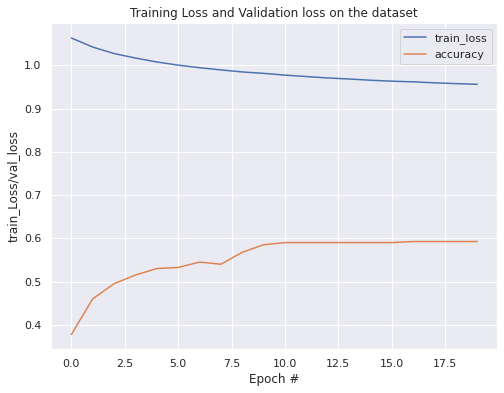

In [105]:

N = 20
import pylab as plt
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="accuracy")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="middle")
plt.show()

In [106]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 7ms/step - loss: 0.9268 - accuracy: 0.6300


[0.9267668128013611, 0.6299999952316284]

In [107]:
model = keras.Sequential([
keras.layers.Dense(11, input_shape=(11,), activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(6, activation='relu'),
keras.layers.Dropout(0.5),
keras.layers.Dense(3,activation='softmax')
])
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
13/13 [==============================] - 1s 8ms/step - loss: 1.3425 - accuracy: 0.3525
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 1.3081 - accuracy: 0.3775
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 1.2040 - accuracy: 0.4325
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 1.1702 - accuracy: 0.4400
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 1.2105 - accuracy: 0.4150
Epoch 6/20
13/13 [==============================] - 0s 8ms/step - loss: 1.1594 - accuracy: 0.4550
Epoch 7/20
13/13 [==============================] - 0s 8ms/step - loss: 1.0953 - accuracy: 0.4775
Epoch 8/20
13/13 [==============================] - 0s 8ms/step - loss: 1.1042 - accuracy: 0.4900
Epoch 9/20
13/13 [==============================] - 0s 7ms/step - loss: 1.0963 - accuracy: 0.4950
Epoch 10/20
13/13 [==============================] - 0s 7ms/step - loss: 1.0603 - accuracy: 0.5225
Epoch 11/20
13/13 [

In [108]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 9ms/step - loss: 0.9426 - accuracy: 0.6300


[0.942577600479126, 0.6299999952316284]